               sales
date                
20-02-2023  0.000000
21-02-2023  0.111111
22-02-2023  0.555556
23-02-2023  0.611111
24-02-2023  0.666667
               sales
date                
25-02-2023  0.833333
26-02-2023  0.944444
27-02-2023  1.000000
Sequences:date
20-02-2023    0.0
Name: sales, dtype: float64
labels:0.11111111111111094
Sequences:date
21-02-2023    0.111111
Name: sales, dtype: float64
labels:0.5555555555555554
Sequences:date
22-02-2023    0.555556
Name: sales, dtype: float64
labels:0.6111111111111109
Sequences:date
23-02-2023    0.611111
Name: sales, dtype: float64
labels:0.6666666666666665
Sequences:date
25-02-2023    0.833333
Name: sales, dtype: float64
labels:0.9444444444444442
Sequences:date
26-02-2023    0.944444
Name: sales, dtype: float64
labels:1.0
Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 0.2835
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.2800
Epoch 3/100
2/2 [==============================] - 0s 13ms/

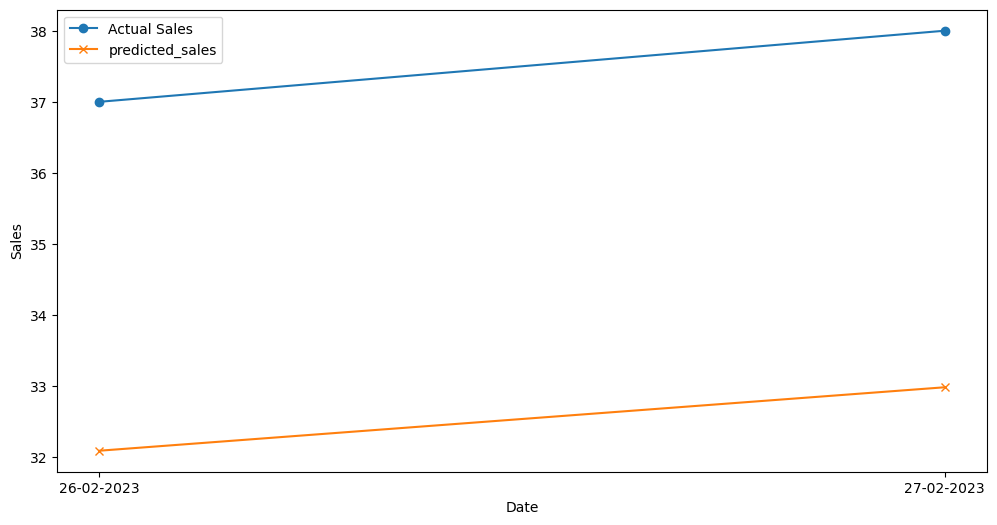

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense

date_rng=["20-02-2023","21-02-2023","22-02-2023","23-02-2023","24-02-2023",
          "25-02-2023","26-02-2023","27-02-2023"]
sales_data=[20,22,30,31,32,35,37,38]
data=pd.DataFrame({'date':date_rng,'sales':sales_data})
data=data.set_index("date")



#Normalize the scales data
scaler = MinMaxScaler()
data['sales']=scaler.fit_transform(data['sales'].values.reshape(-1,1))
# print(data['sales'])
# Split the data into training and testing sets
train_size = int(len(data)*0.7)
train_data,test_data = data[:train_size],data[train_size:]

print(train_data)
print(test_data)

# Create sequence of data for training
def create_sequence(data,sequence_length):
    sequences,labels = [],[]
    for i in range(len(data)-sequence_length):
        sequence = data.iloc[i:i+sequence_length]['sales']
        target = data.iloc[i+sequence_length]['sales']
        sequences.append(sequence)
        labels.append(target)
        print("Sequences:{}".format(sequence))
        print("labels:{}".format(target))
    return np.array(sequences),np.array(labels)


sequence_length = 1 #you can adjust this based on your data
X_train, y_train = create_sequence(train_data, sequence_length)
X_test, y_test = create_sequence(test_data, sequence_length)

#Build the LSTM model
model = Sequential()
model.add(LSTM(50,  activation='relu', input_shape=(sequence_length,1)))# 50 neurons in a single layer will be created
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')#mean_squared_error thats the actual difference between actaul data and the model predicted

#Train the model
model.fit(X_train,y_train,epochs=100,batch_size=2)

# Make prediction
type(X_test)
predicted_sales= model.predict(X_test)
# print(type(test_data["sales"][sequence_length:].to_numpy()))
# Inverse transform the scaled prediction
predicted_sales= scaler.inverse_transform(predicted_sales)
actual_sales= scaler.inverse_transform(test_data['sales'][sequence_length:].to_numpy().reshape(-1,1))
print()
# plot the actual vs. predicted sales
plt.figure(figsize=(12,6))
plt.plot(test_data.index[sequence_length:],actual_sales,label='Actual Sales',marker='o')
plt.plot(test_data.index[sequence_length:],predicted_sales,label='predicted_sales', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [30]:
type(test_data['sales'][sequence_length:].to_numpy().reshape(-1,1))

numpy.ndarray

In [34]:
scaler = MinMaxScaler()
data['sales']=scaler.fit_transform(data['sales'].values.reshape(-1,1))
data['sales']

date
20-02-2023    0.000000
21-02-2023    0.111111
22-02-2023    0.555556
23-02-2023    0.611111
24-02-2023    0.666667
25-02-2023    0.833333
26-02-2023    0.944444
27-02-2023    1.000000
Name: sales, dtype: float64

In [54]:
model.fit(X_train,y_train,epochs=100,batch_size=2)


Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0164
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0164
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 0.0322

2/2 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0163
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0164
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 13/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 14/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 15/100
2/2 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 16/100
2/2 [==============================] - 0s 15ms/step - loss: 0.0163
Epoch 17/100
2/2 [==============================] - 0s 6ms/step - lo

In [31]:
pip install tenserflow


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [22]:
data['sales']=scaler.fit_transform(data['sales'].values.reshape(-1,1))
data

,sales
date,
20-02-2023,0.000000
21-02-2023,0.111111
22-02-2023,0.555556
23-02-2023,0.611111
24-02-2023,0.666667
25-02-2023,0.833333
26-02-2023,0.944444
27-02-2023,1.000000


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense

data=pd.read_csv('xyz_sales_data.csv')
data[['Date','Order_Quantity']]
data=data.set_index("Date")

data1=data[['Order_Quantity']]
data1

,Order_Quantity
Date,
26-11-2013,8
26-11-2015,8
23-03-2014,23
23-03-2016,20
15-05-2014,4
...,...
12-04-2016,3
02-04-2014,22
02-04-2016,22
